In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Section 1: Dataset Overview and Missing Values

In [23]:
# Show the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [24]:
# Dataset shape
df.shape

(8807, 12)

In [25]:
# Data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [26]:
# Count of missing values per column
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

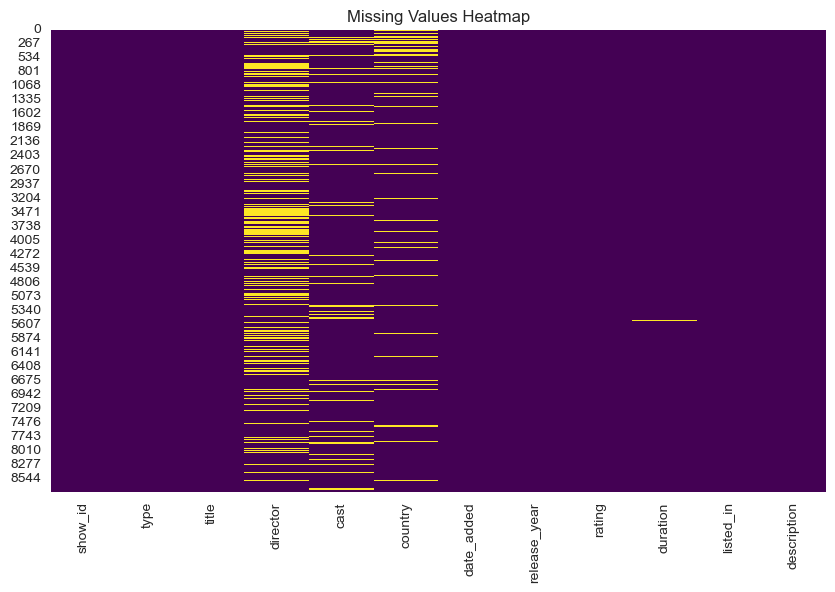

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Section 2: Movies vs TV Shows Distribution

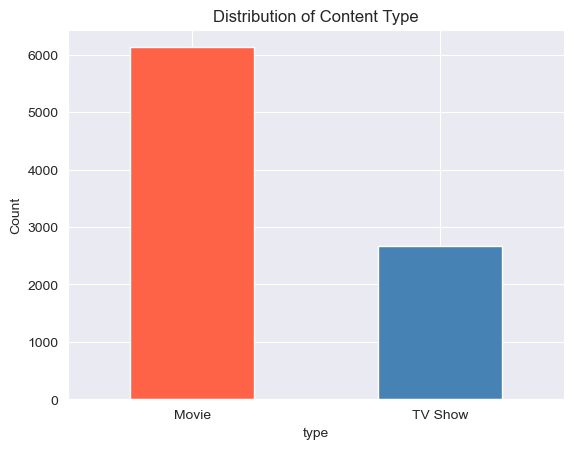

In [28]:
type_counts = df['type'].value_counts()

# Barplot
type_counts.plot(kind='bar', color=['tomato', 'steelblue'])
plt.title("Distribution of Content Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Section 3: Top 10 Countries Producing Content

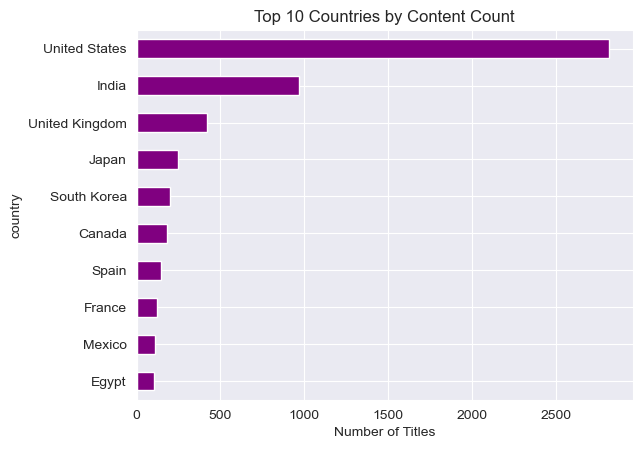

In [29]:
df['country'].dropna(inplace=True)
top_countries = df['country'].value_counts().head(10)

# Barplot
top_countries.plot(kind='barh', color='purple')
plt.title("Top 10 Countries by Content Count")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()

# Section 4: Content Release Trend Over the Years

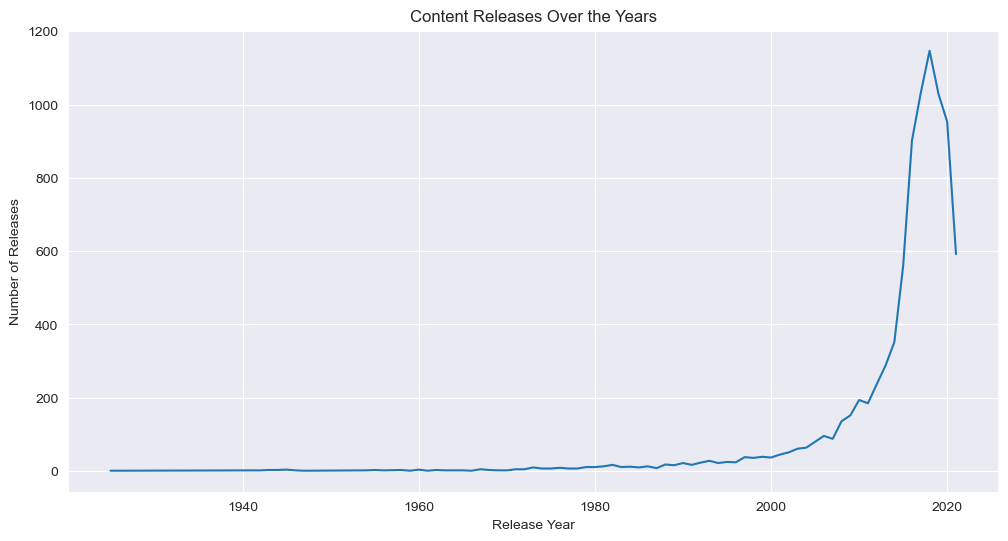

In [30]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.title("Content Releases Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Releases")
plt.grid(True)
plt.show()

# Section 5: Content Rating Distribution

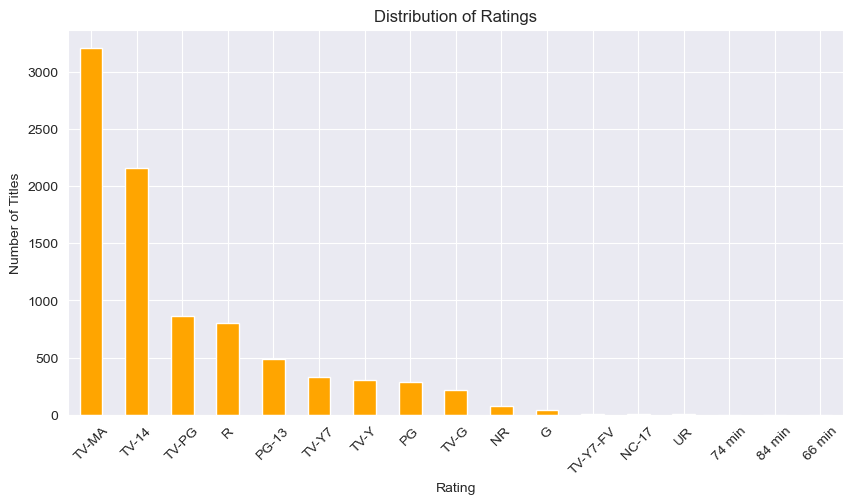

In [31]:
df['rating'].value_counts().plot(kind='bar', figsize=(10, 5), color='orange')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

# Section 6: Duration Analysis

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Aghabidareh\AppData\Local\Temp\ipykernel_2868\3236181917.py:6: SyntaxWarning: invalid escape sequence '\d'
  movies['duration_int'] = movies['duration'].str.extract('(\d+)').astype(float)
C:\Users\Aghabidareh\AppData\Local\Temp\ipykernel_2868\3236181917.py:9: SyntaxWarning: invalid escape sequence '\d'
  tv_shows['duration_int'] = tv_shows['duration'].str.extract('(\d+)').astype(float)
C:\Users\Aghabidareh\AppData\Local\Temp\ipykernel_2868\3236181917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_int'] = movies['duratio

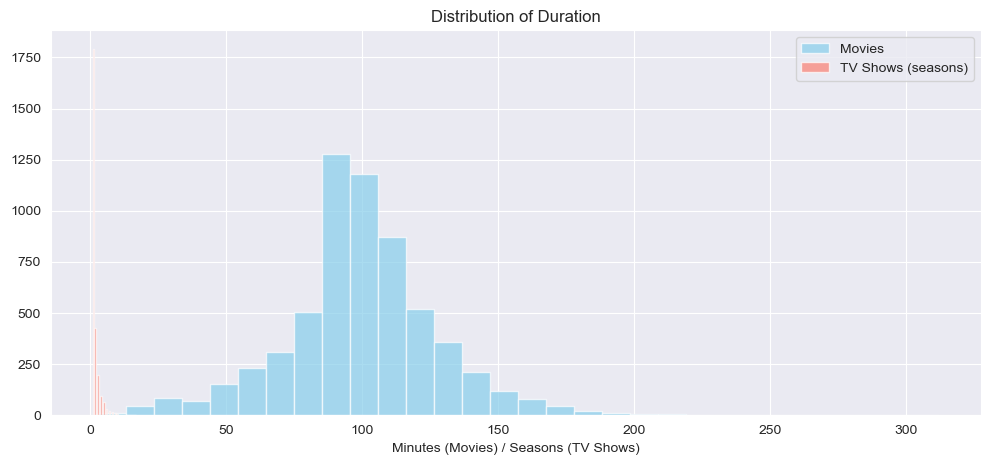

In [33]:
# Separate duration into minutes and seasons
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Movie duration (convert "90 min" to int)
movies['duration_int'] = movies['duration'].str.extract('(\d+)').astype(float)

# TV Show seasons
tv_shows['duration_int'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# Histograms
plt.figure(figsize=(12, 5))
plt.hist(movies['duration_int'].dropna(), bins=30, alpha=0.7, label='Movies', color='skyblue')
plt.hist(tv_shows['duration_int'].dropna(), bins=30, alpha=0.7, label='TV Shows (seasons)', color='salmon')
plt.title("Distribution of Duration")
plt.xlabel("Minutes (Movies) / Seasons (TV Shows)")
plt.legend()
plt.show()

# Section 7: Top 10 Frequent Categories

C:\Users\Aghabidareh\AppData\Local\Temp\ipykernel_2868\1193135827.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genres_df, x='Count', y='Genre', palette='coolwarm')


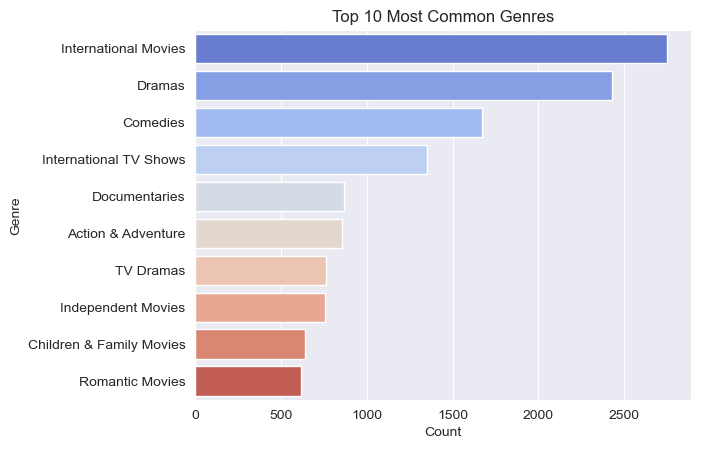

In [36]:
from collections import Counter
import itertools

# Flatten and count genres
genres = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
all_genres = list(itertools.chain(*genres))
top_genres = Counter(all_genres).most_common(10)

# Convert to dataframe for plotting
genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Plot
sns.barplot(data=genres_df, x='Count', y='Genre', palette='coolwarm')
plt.title("Top 10 Most Common Genres")
plt.show()

# Section 8: Top 10 Directors

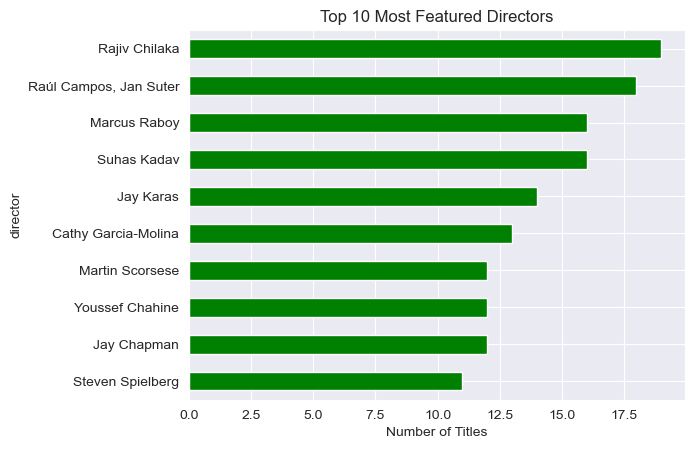

In [37]:
top_directors = df['director'].dropna().value_counts().head(10)

top_directors.plot(kind='barh', color='green')
plt.title("Top 10 Most Featured Directors")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()

# Section 9: Word Cloud of Descriptions

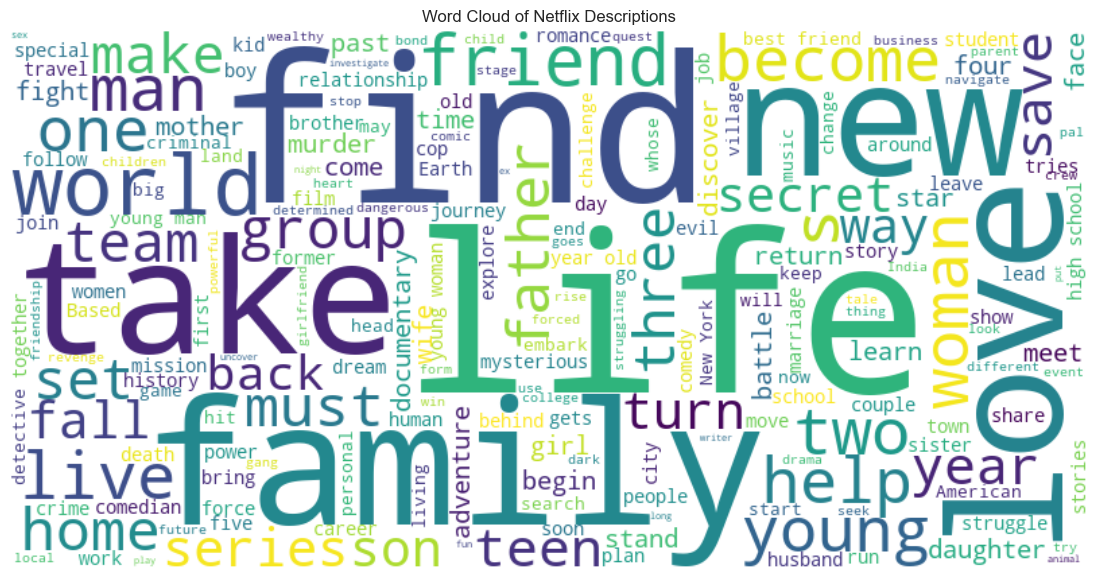

In [40]:
from wordcloud import WordCloud

text = " ".join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Netflix Descriptions")
plt.show()

# Section 10: Monthly Trend of Content Added

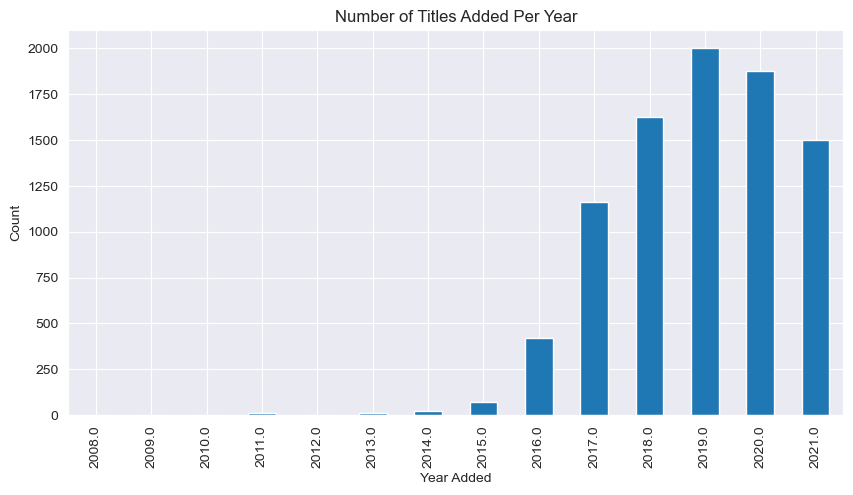

In [41]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Trend by year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Number of Titles Added Per Year")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.show()

# Section 11: Top Countries with Highest Content Production

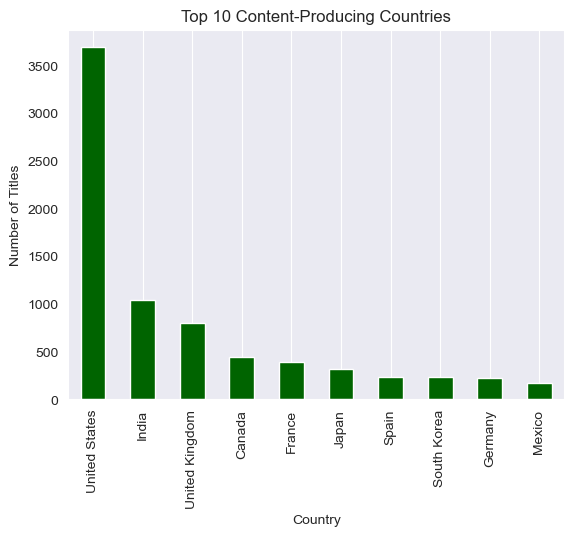

In [42]:
# Top 10 countries with most titles produced
top_countries = df['country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)
top_countries.plot(kind='bar', color='darkgreen', title='Top 10 Content-Producing Countries')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.show()

# Section 12: Average Duration of Movies

In [43]:
# Average movie duration in minutes
movies = df[df['type'] == 'Movie'].copy()
movies['duration_minutes'] = movies['duration'].str.extract(r'(\d+)').astype(float)
avg_duration = movies['duration_minutes'].mean()
print(f'Average movie duration: {avg_duration:.2f} minutes')

Average movie duration: 99.58 minutes


# Section 13: Most Common Movie Durations

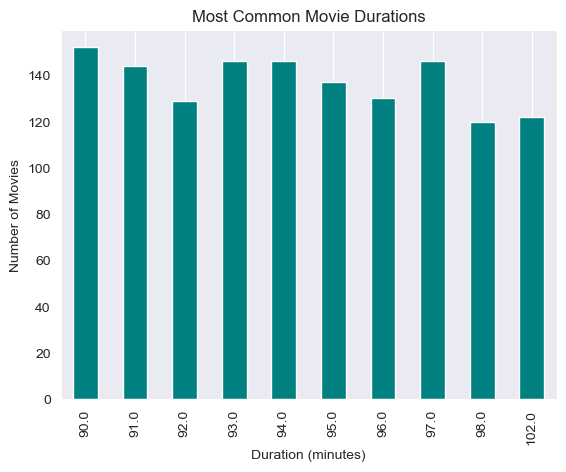

In [44]:
# Distribution of common movie durations
common_durations = movies['duration_minutes'].value_counts().head(10).sort_index()
common_durations.plot(kind='bar', color='teal', title='Most Common Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.show()

# Section 14: TV Show Seasons Distribution

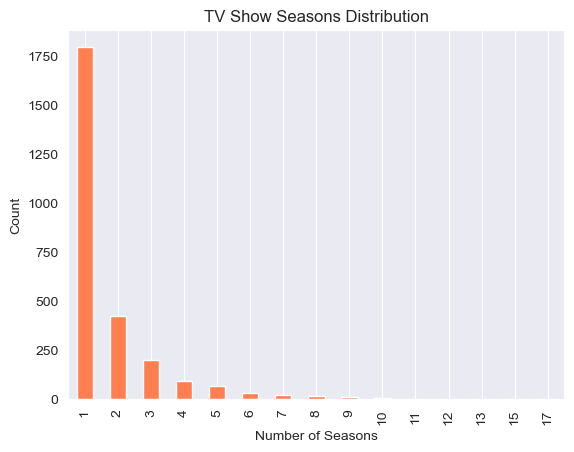

In [45]:
# Extract number of seasons from duration field
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['num_seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(int)
tv_shows['num_seasons'].value_counts().sort_index().plot(kind='bar', title='TV Show Seasons Distribution', color='coral')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()